IMPORTING THE DEPENDENCIES


In [2]:
from google.colab import files
uploaded = files.upload()
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
import io
import matplotlib.pyplot as plot
iris_dataset = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

Saving Iris.csv to Iris.csv


DATA COLLECTION AND ANALYSIS


In [3]:
iris_dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris_dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
iris_dataset.shape

(150, 6)

In [6]:
iris_dataset.size

900

In [7]:
iris_dataset.ndim

2

In [8]:
#getting the statistical measures of the data
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris_dataset.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [10]:
#seperating the data and labels
X = iris_dataset.drop(columns = 'Species',axis = 1)
Y = iris_dataset['Species']
print(X)
print(Y)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virgin

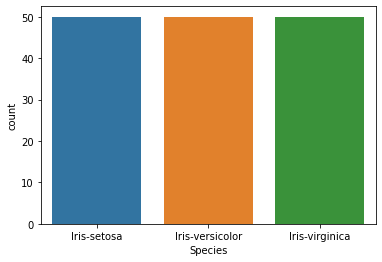

In [11]:
sns.countplot(x ='Species',data =iris_dataset)

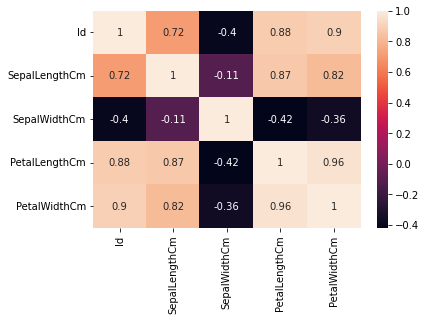

In [12]:
#correlation matrix to show correlation between two variables, 0, x means x% similar
corr_mat = iris_dataset.corr()
sns.heatmap(corr_mat, annot = True)

EXPLORATORY DATA ANALYSIS

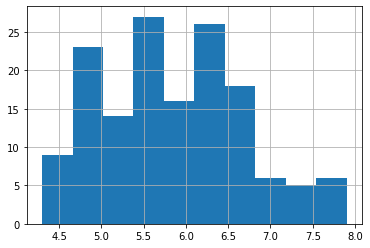

In [13]:
iris_dataset['SepalLengthCm'].hist()

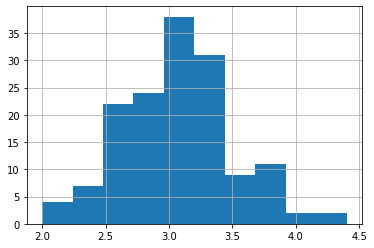

In [14]:
iris_dataset['SepalWidthCm'].hist()

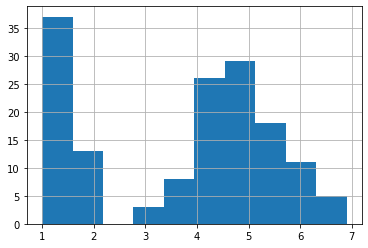

In [15]:
iris_dataset['PetalLengthCm'].hist()

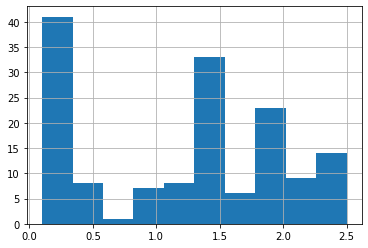

In [16]:
iris_dataset['PetalWidthCm'].hist()

In [17]:
colors = ['pink' , 'purple' , 'blue']
Species = ['Iris-setosa' , 
'Iris-versicolor' , 
'Iris-virginica' ]

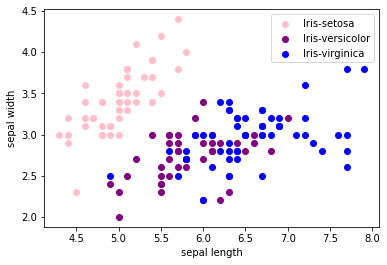

In [18]:
for i in range(3):
    x = iris_dataset[iris_dataset['Species'] == Species[i]]
    plot.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=Species[i])
plot.xlabel("sepal length")
plot.ylabel("sepal width")
plot.legend() 

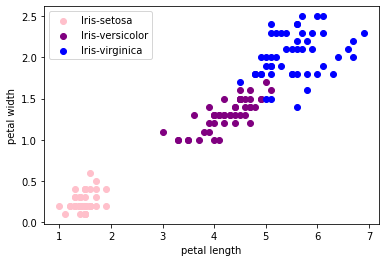

In [19]:
for i in range(3):
    x = iris_dataset[iris_dataset['Species'] == Species[i]]
    plot.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=Species[i])
plot.xlabel("petal length")
plot.ylabel("petal width")
plot.legend() 

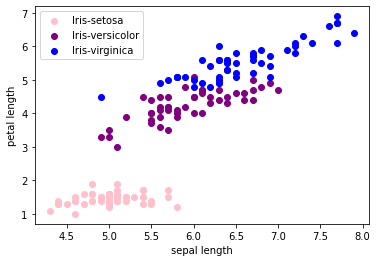

In [20]:
for i in range(3):
    x = iris_dataset[iris_dataset['Species'] == Species[i]]
    plot.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=Species[i])
plot.xlabel("sepal length")
plot.ylabel("petal length")
plot.legend() 

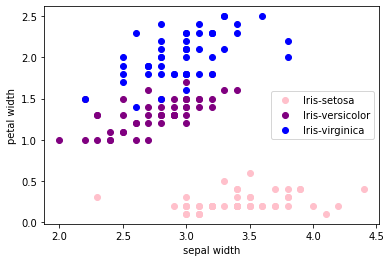

In [21]:
for i in range(3):
    x = iris_dataset[iris_dataset['Species'] == Species[i]]
    plot.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=Species[i])
plot.xlabel("sepal width")
plot.ylabel("petal width")
plot.legend() 

DATA STANDARDIZATION

In [22]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [23]:
standardized_data = scaler.transform(X)

In [24]:
print(standardized_data)

[[-1.72054204e+00 -9.00681170e-01  1.03205722e+00 -1.34127240e+00
  -1.31297673e+00]
 [-1.69744751e+00 -1.14301691e+00 -1.24957601e-01 -1.34127240e+00
  -1.31297673e+00]
 [-1.67435299e+00 -1.38535265e+00  3.37848329e-01 -1.39813811e+00
  -1.31297673e+00]
 [-1.65125846e+00 -1.50652052e+00  1.06445364e-01 -1.28440670e+00
  -1.31297673e+00]
 [-1.62816394e+00 -1.02184904e+00  1.26346019e+00 -1.34127240e+00
  -1.31297673e+00]
 [-1.60506942e+00 -5.37177559e-01  1.95766909e+00 -1.17067529e+00
  -1.05003079e+00]
 [-1.58197489e+00 -1.50652052e+00  8.00654259e-01 -1.34127240e+00
  -1.18150376e+00]
 [-1.55888037e+00 -1.02184904e+00  8.00654259e-01 -1.28440670e+00
  -1.31297673e+00]
 [-1.53578584e+00 -1.74885626e+00 -3.56360566e-01 -1.34127240e+00
  -1.31297673e+00]
 [-1.51269132e+00 -1.14301691e+00  1.06445364e-01 -1.28440670e+00
  -1.44444970e+00]
 [-1.48959680e+00 -5.37177559e-01  1.49486315e+00 -1.28440670e+00
  -1.31297673e+00]
 [-1.46650227e+00 -1.26418478e+00  8.00654259e-01 -1.22754100e+00

In [25]:
X = standardized_data
Y = iris_dataset['Species']
print(X)
print(Y)

[[-1.72054204e+00 -9.00681170e-01  1.03205722e+00 -1.34127240e+00
  -1.31297673e+00]
 [-1.69744751e+00 -1.14301691e+00 -1.24957601e-01 -1.34127240e+00
  -1.31297673e+00]
 [-1.67435299e+00 -1.38535265e+00  3.37848329e-01 -1.39813811e+00
  -1.31297673e+00]
 [-1.65125846e+00 -1.50652052e+00  1.06445364e-01 -1.28440670e+00
  -1.31297673e+00]
 [-1.62816394e+00 -1.02184904e+00  1.26346019e+00 -1.34127240e+00
  -1.31297673e+00]
 [-1.60506942e+00 -5.37177559e-01  1.95766909e+00 -1.17067529e+00
  -1.05003079e+00]
 [-1.58197489e+00 -1.50652052e+00  8.00654259e-01 -1.34127240e+00
  -1.18150376e+00]
 [-1.55888037e+00 -1.02184904e+00  8.00654259e-01 -1.28440670e+00
  -1.31297673e+00]
 [-1.53578584e+00 -1.74885626e+00 -3.56360566e-01 -1.34127240e+00
  -1.31297673e+00]
 [-1.51269132e+00 -1.14301691e+00  1.06445364e-01 -1.28440670e+00
  -1.44444970e+00]
 [-1.48959680e+00 -5.37177559e-01  1.49486315e+00 -1.28440670e+00
  -1.31297673e+00]
 [-1.46650227e+00 -1.26418478e+00  8.00654259e-01 -1.22754100e+00

TEST TRAIN SPLIT

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=15)
print(X.shape, X_train.shape, X_test.shape)

(150, 5) (120, 5) (30, 5)


In [27]:
classifier = svm.SVC(kernel = 'linear')
#training the support vector machine classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

MODEL EVALUATION

Accuracy Score

In [28]:
#accuracy score on the training data
X_train_predicition = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predicition, Y_train)


In [29]:
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 1.0


MAKE A PREDICTIVE SYSTEM

In [30]:
input_data = (1,5.1,3.5,1.4,0.2)
#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)
if (prediction == "Iris-setosa"):
 print('Iris-setosa')
elif(prediction == "Iris-versicolor"):
 print('Iris-versicolor')
else:
  print('Iris-virginica')

[[-1.72054204 -0.90068117  1.03205722 -1.3412724  -1.31297673]]
['Iris-setosa']
Iris-setosa


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [31]:
knn = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski')
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=25)

In [32]:
knn_Y_pred = knn.predict(X_test)

In [33]:
knn_Y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

CONFUSION MATRIX

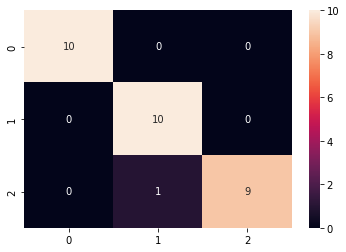

In [34]:
knn_cm = confusion_matrix(Y_test,knn_Y_pred)
sns.heatmap(knn_cm,annot = True)